Лабораторная работа №8. Рекуррентные нейронные сети для анализа временных рядов

In [18]:
# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
import pdb
import os
import scipy.io
from sklearn.model_selection import train_test_split
import tarfile
from six.moves import cPickle as pickle
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import re
!python3 -m pip install statsmodels
import pandas as pd
import statsmodels
import matplotlib

Задание 1.
Загрузите данные. Изобразите ряд в виде графика. Вычислите основные характеристики временного ряда (сезонность, тренд, автокорреляцию).


In [5]:
data = pd.read_csv('../data/sunspots/Sunspots.csv')
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [9]:
# Refactor

data = pd.read_csv('../data/sunspots/Sunspots.csv')
data = data.drop(columns='Unnamed: 0')
data = data.rename(columns={'Monthly Mean Total Sunspot Number': 'value', 'Date': 'date'})
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data.head()

,value
date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


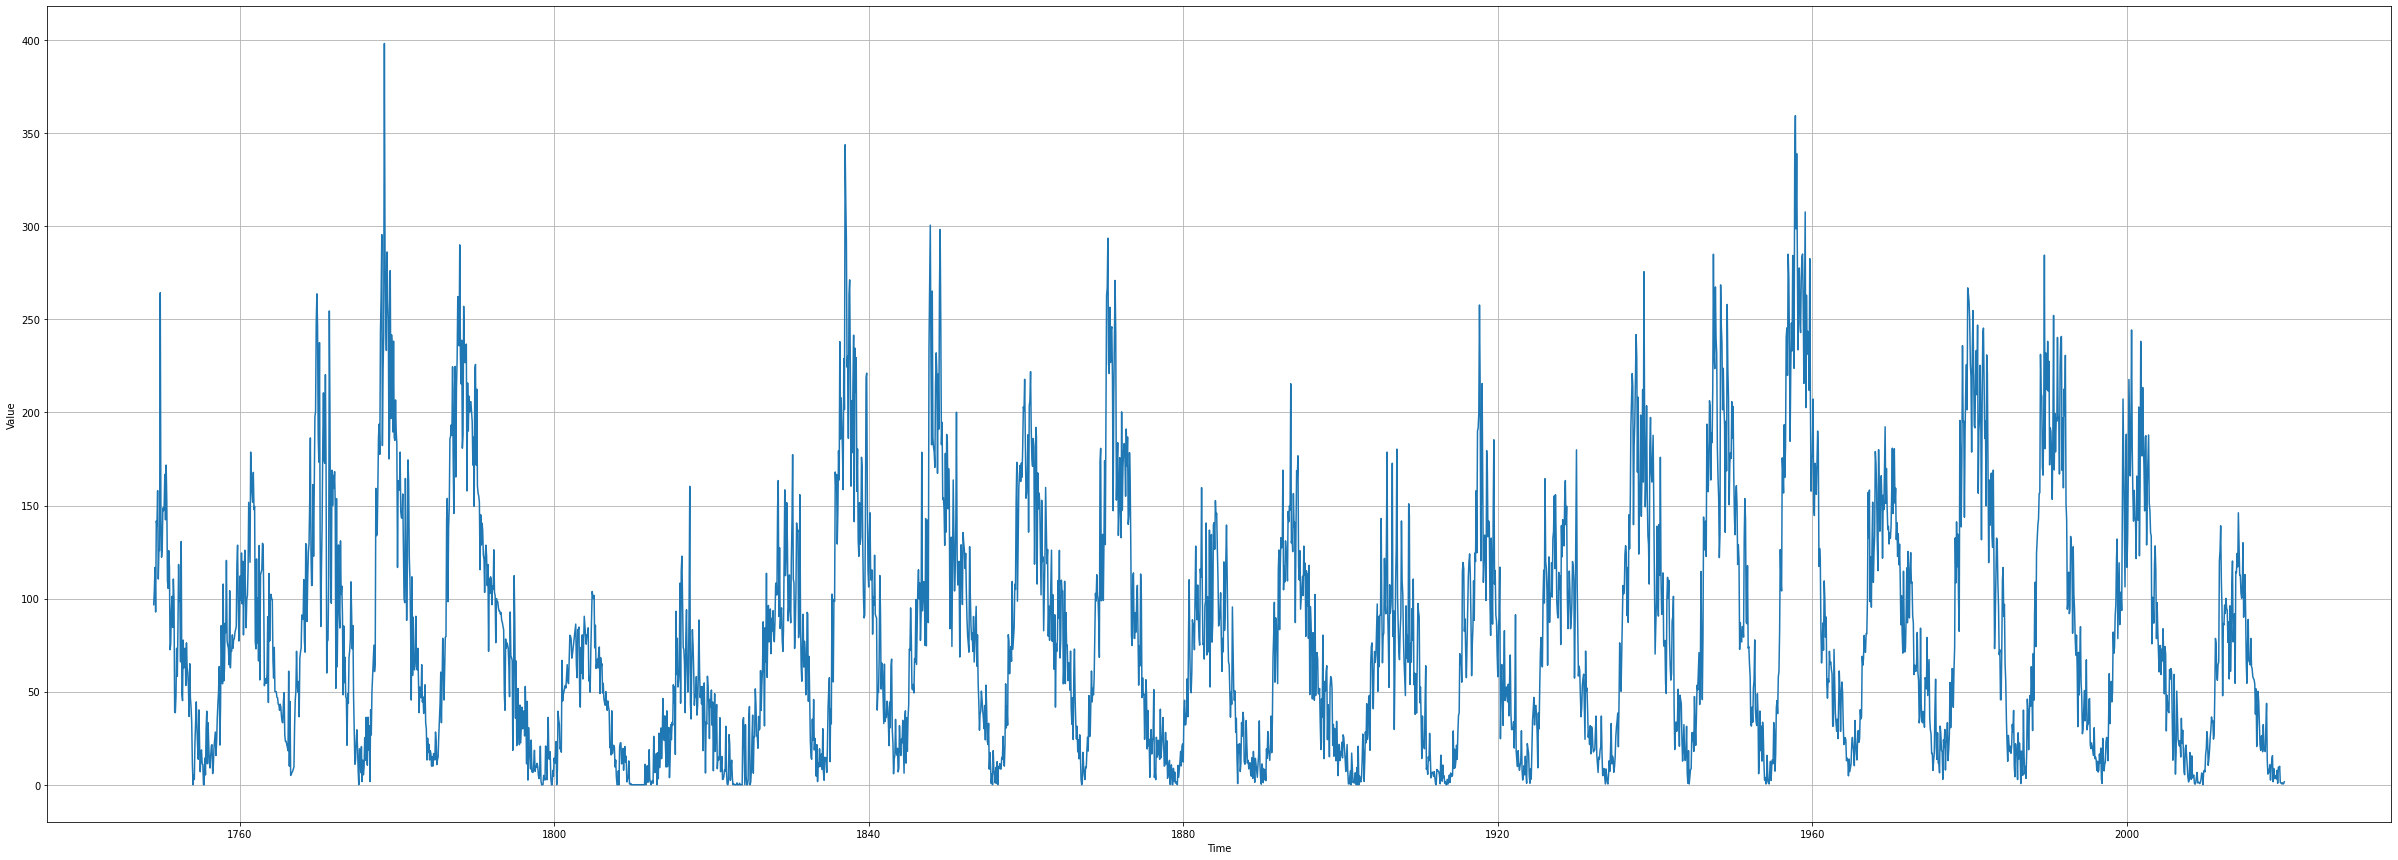

In [15]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(42, 15))
plot_series(data.index, data['value'])

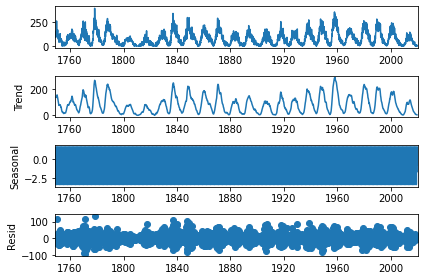

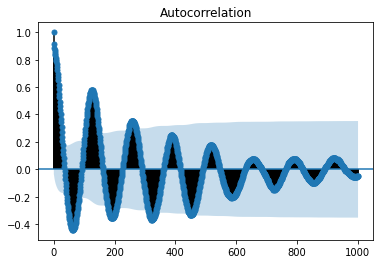

In [19]:
decomposition = statsmodels.api.tsa.seasonal_decompose(data, model='additive')
figure = decomposition.plot()
statsmodels.graphics.tsaplots.plot_acf(data['value'], lags=1000)
plt.show()

Задание 2.
Для прогнозирования разделите временной ряд на обучающую, валидационную и контрольную выборки.


In [22]:
train_data, valid_data = train_test_split(data, test_size=0.1, shuffle=False)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

print(train_data.shape, valid_data.shape, test_data.shape)

(2601, 1) (326, 1) (651, 1)
